In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# import data
data = pd.read_csv(r"D:\Willy's Project\Project\Magang Diskominfo\data\dataset_final_translated.csv")
data.head()

title  stars                                               text
0  RS Brayat Minulya      5  telah dirawat di sini selama beberapa hari di ...
1  RS Brayat Minulya      5  bersih dan rapi petugas peeawatdokter ditanya ...
2  RS Brayat Minulya      5  terimakasih atas pelayanan dan perawatan ibu s...
3  RS Brayat Minulya      5  pelayanan diruang yosef bagus perawat ramah ra...
4  RS Brayat Minulya      5  tempatnya bagusrapi nyaman sekali ruangan nya ...

hapus beberapa kata yang tidak perlu

In [3]:
import re

# daftar kata
stopwords = ['saya', 'yg', 'dan', 'yang', 'di', 'tidak', 'juga', 'utk', 'itu',
             'untuk', 'juga', 'jg', 'nya', 'tapi', 'tp', 'ga', 'gak', 'ngga', 'nggak', 'sy', 'lagi',
             'lg', 'dengan', 'dgn', 'dg', 'ini', 'kami', 'apa', 'ada', 'ke', 'ya', 'dong', 'sgt', 'bgt',
             'karena', 'krn', 'sebagai', 'sbg']

def remove_stopwords(text):
    if isinstance(text, str):
        pattern = r'\b(?:' + '|'.join(stopwords) + r')\b'
        return re.sub(pattern, '', text, flags=re.IGNORECASE).strip()
    return text

In [4]:
# apply function
data['text'] = data['text'].apply(remove_stopwords)

## Wordcloud Umum

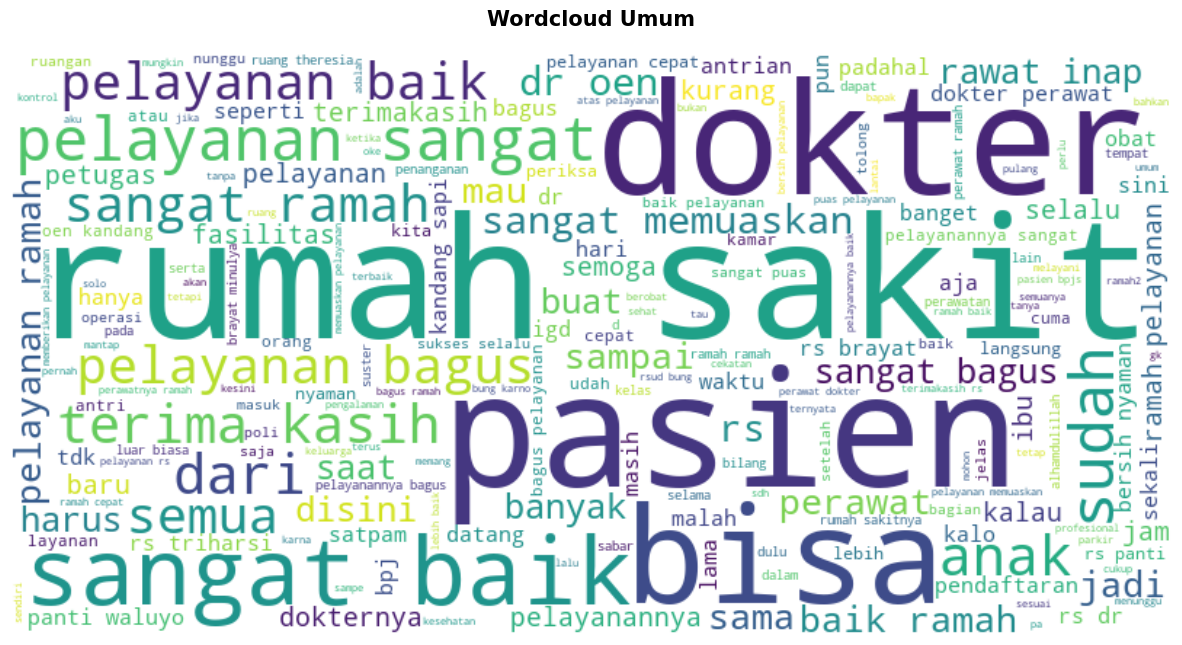

In [5]:
plt.figure(figsize=(15, 10))
# dropna
reviews = data['text'].dropna()
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Umum", fontsize=15, fontweight='bold', pad=20)
plt.show()

## Wordcloud Tiap RS

In [6]:
def wordclouds(data):
    rs = data['title'].unique()

    # looping
    for i in rs:
        # filter
        per_rs = data[data['title'] == i]
        reviews = per_rs['text'].dropna()

        plt.figure(figsize=(15, 10))

        # gabungkan semua teks
        review_combined = " ".join(reviews)

        # wordcloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white",
            max_words=150,
            colormap='viridis'
        ).generate(review_combined)

        # plot
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Wordcloud {i}", fontsize=15, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

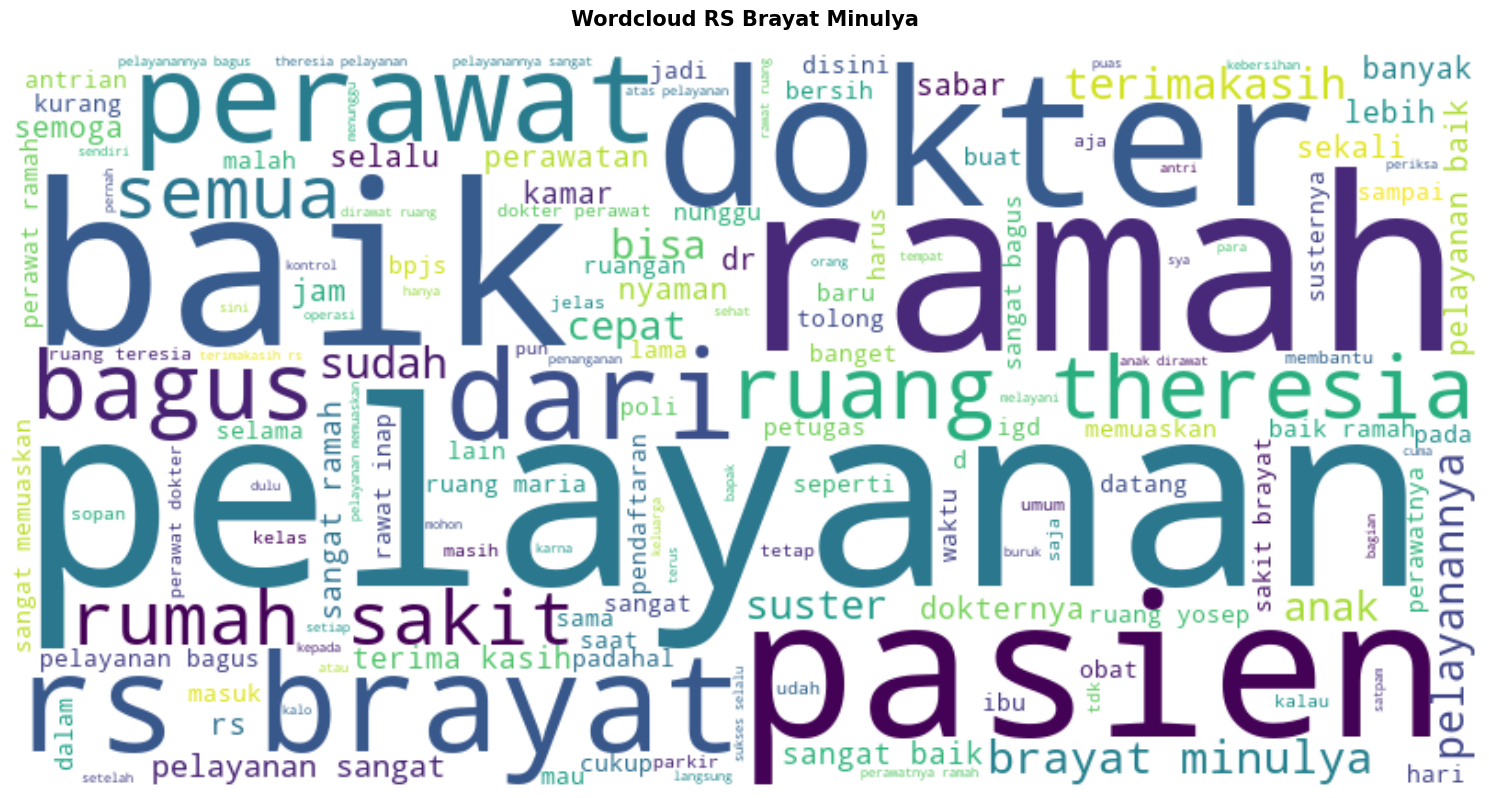

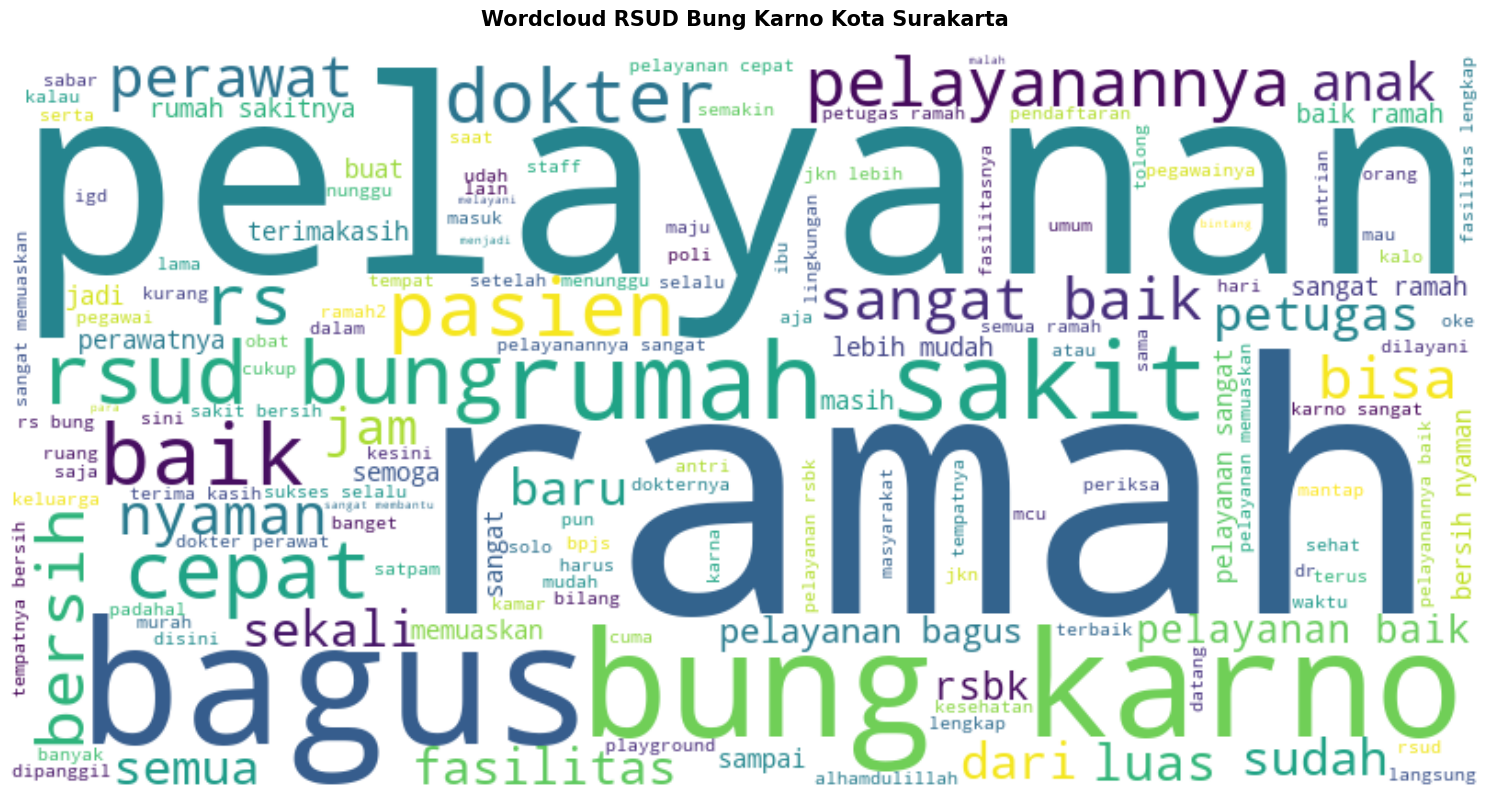

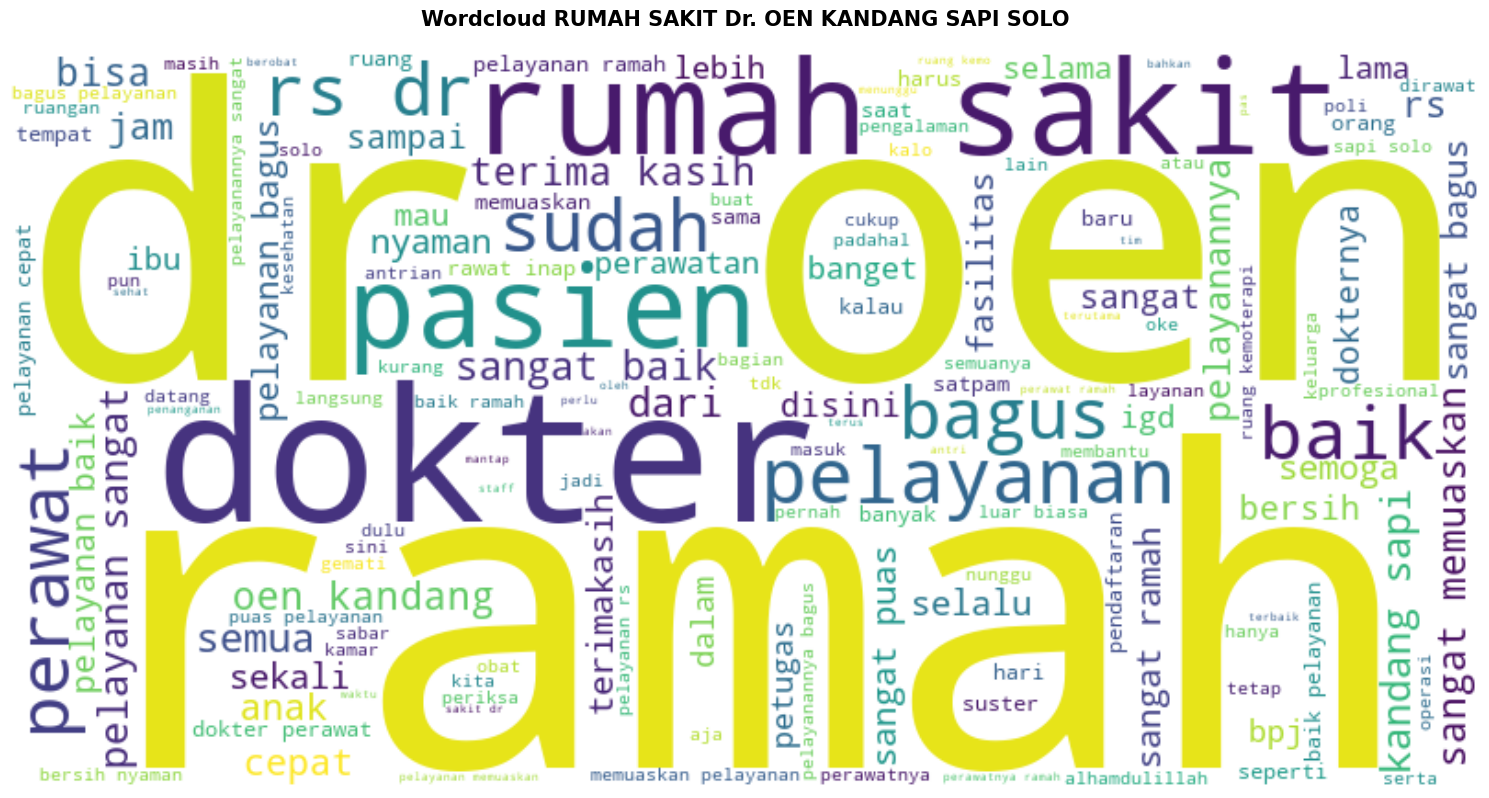

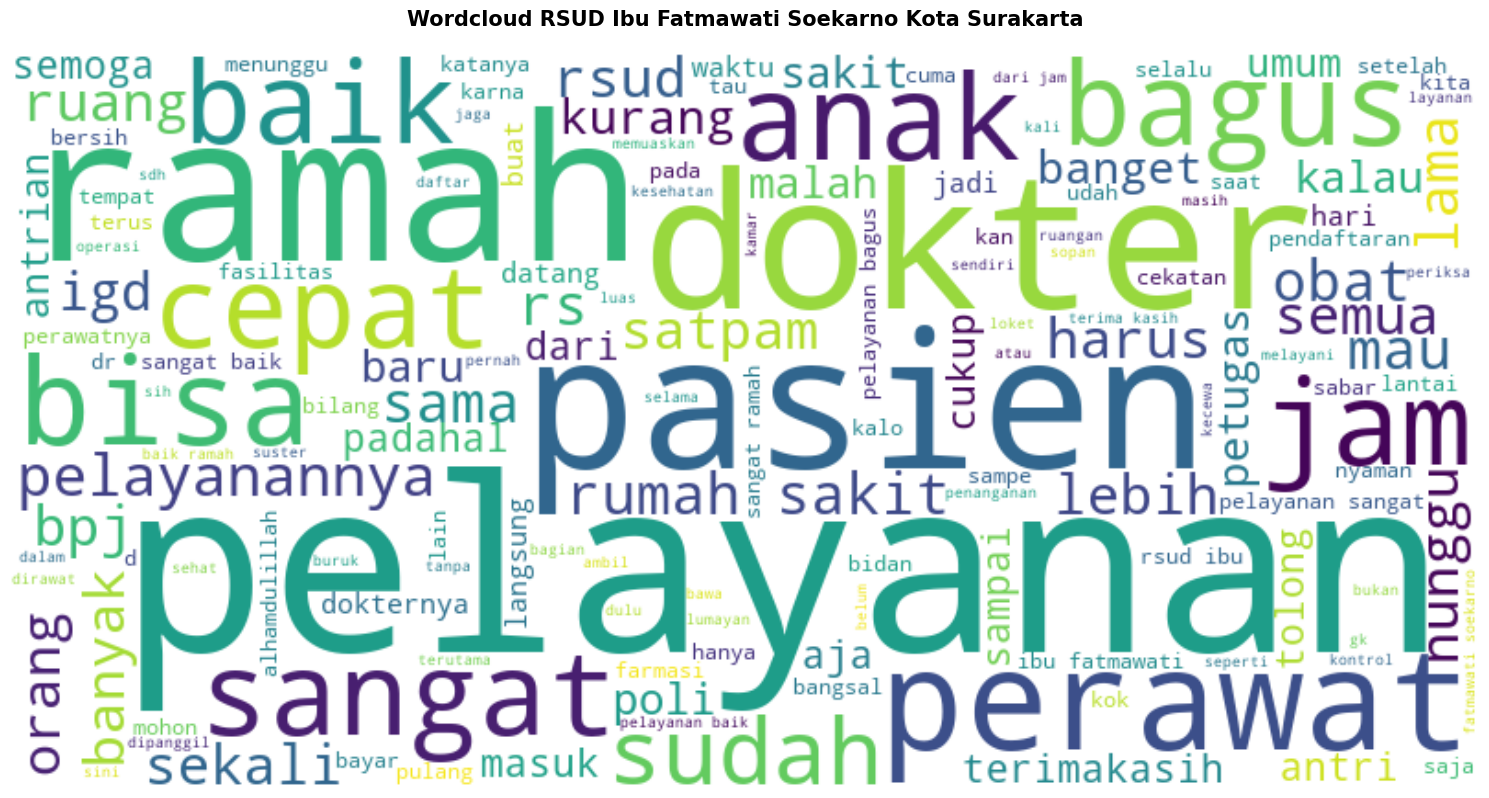

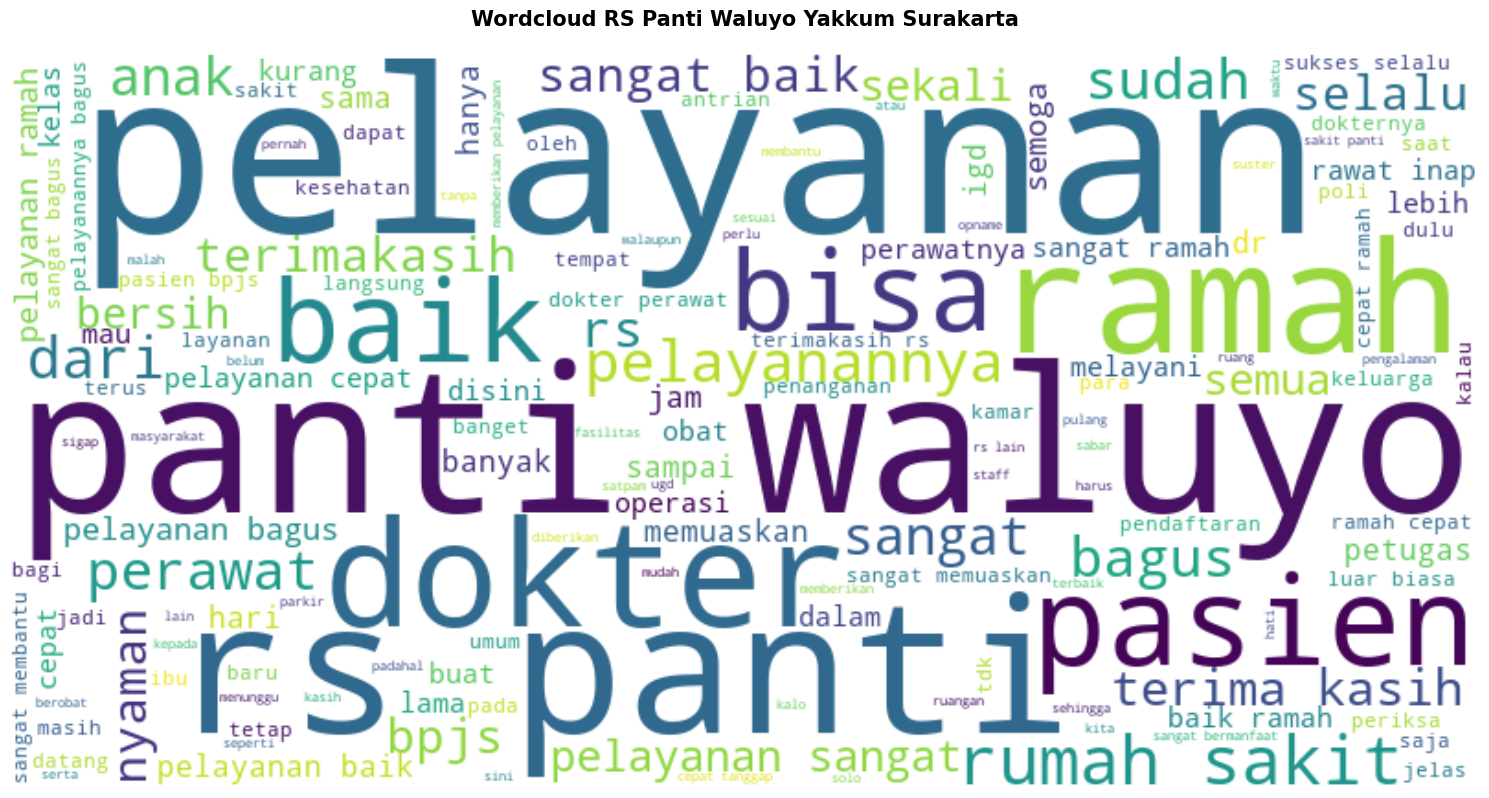

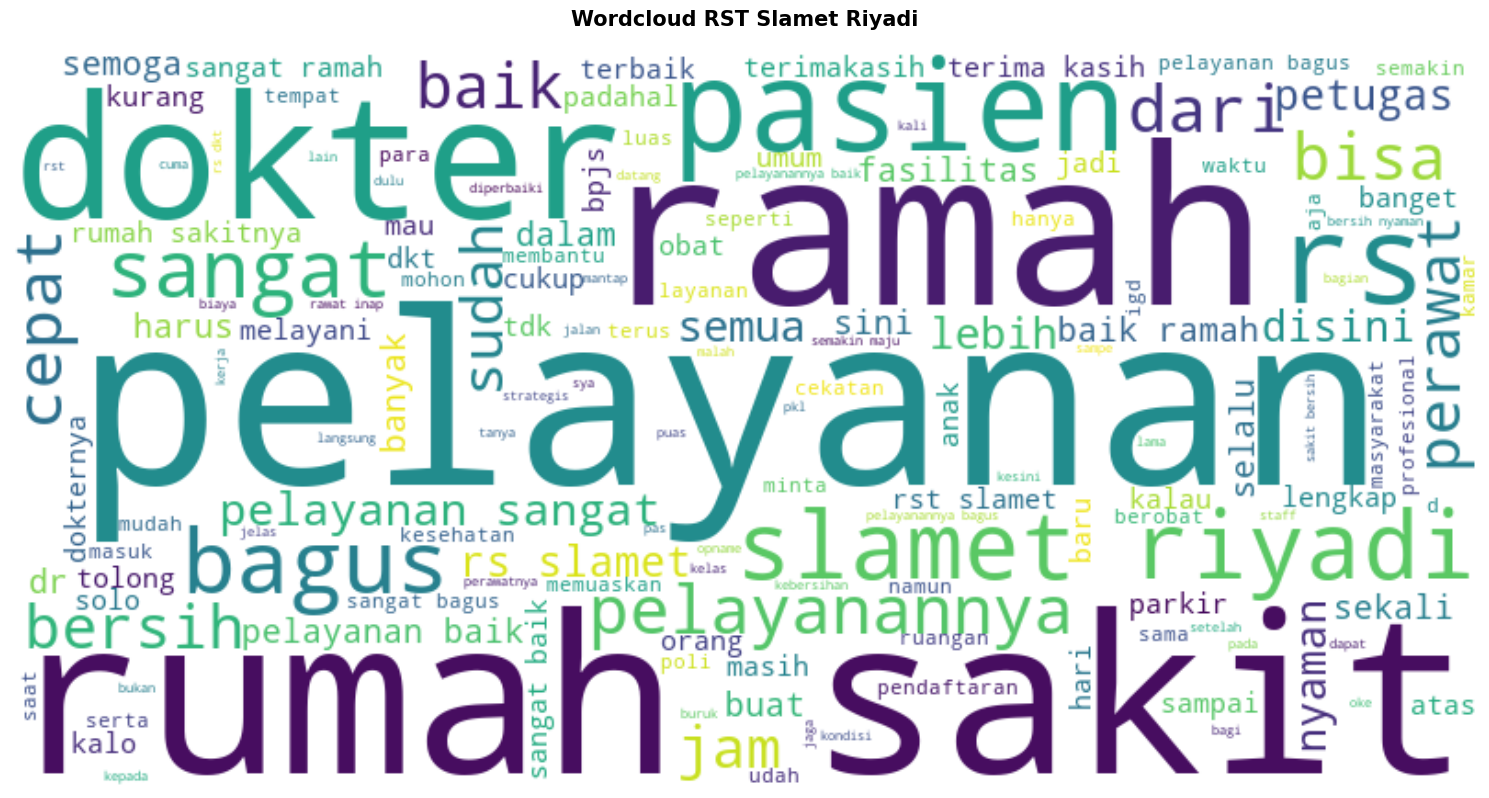

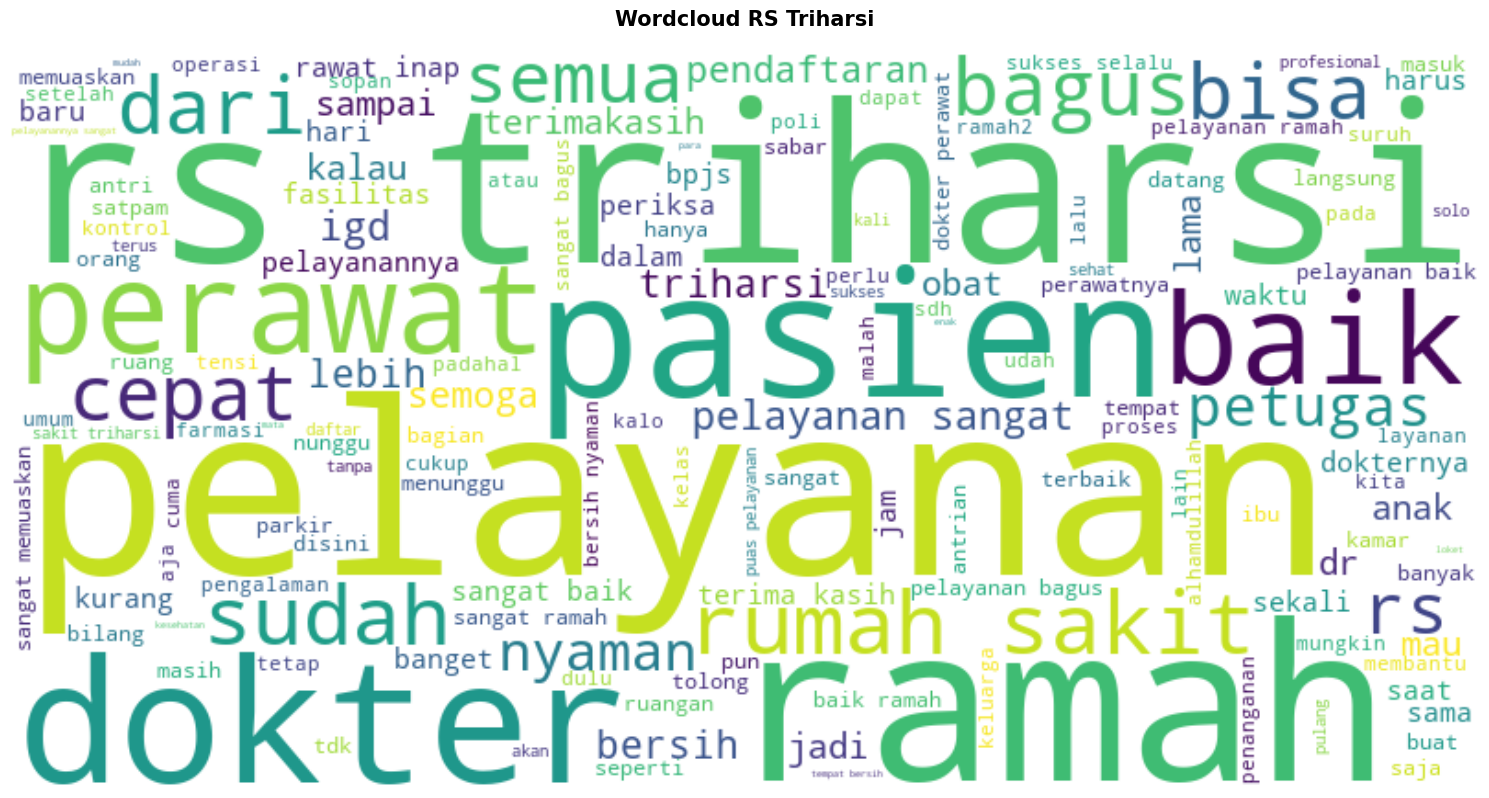

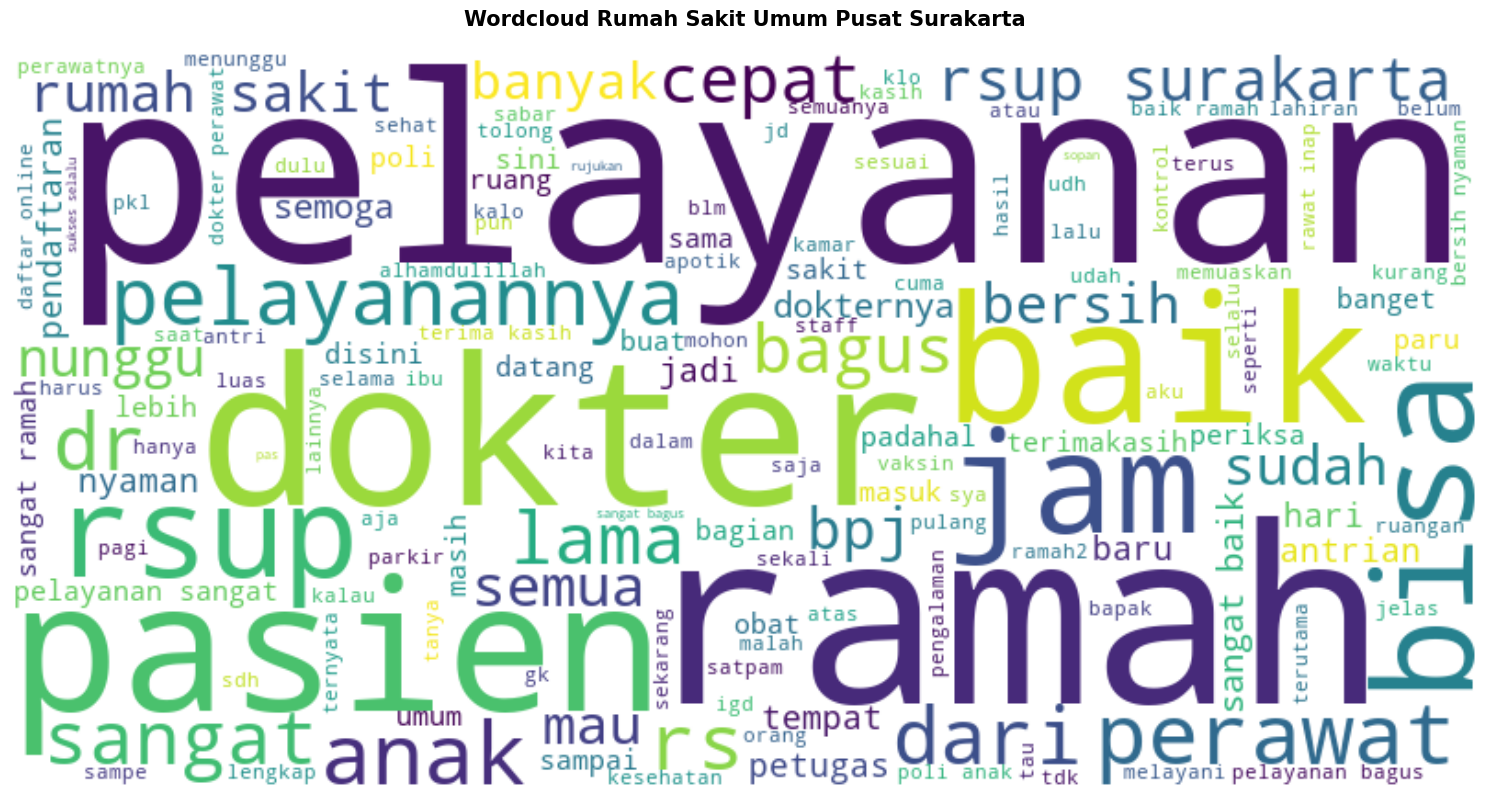

In [7]:
# apply
wordclouds(data)